# Week 9 Lecture 2 - Comparing Two Population
We need to compare the two means of a population is call A/B Testing.  We will compare two population means and see if there is any significant difference.


In [28]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [29]:
births = Table.read_table('baby.csv')
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

In [30]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker | Birth Weight
False           | 120
False           | 113
True            | 128
True            | 108
False           | 136
False           | 138
False           | 132
False           | 120
True            | 143
False           | 140
... (1164 rows omitted)

In [31]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker | count
False           | 715
True            | 459

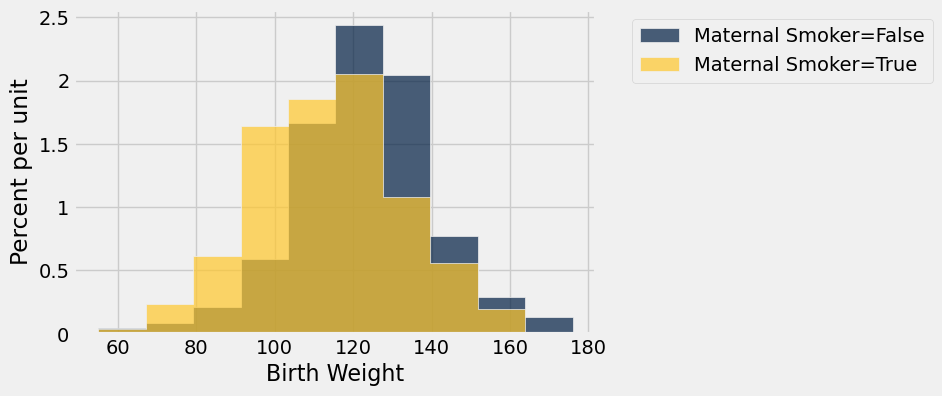

In [32]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

# Hypotheses
**Null Hypothesis:**  The birth weights are the same for Maternal Smokers and Maternal Non-Smokers<br>
**Alternative Hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

# Test Statistic
The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.
                                                                                                                                                        

In [33]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker | Birth Weight average
False           | 123.085
True            | 113.819

In [34]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

# Create a function
To find the difference between the two means, you will create a function to pass the Table and the column name to be grouped by.  It will return the difference of the average of the two groups.

In [35]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row#  belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [36]:
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

# Predicting the Statistic Under the Null Hypothesis
Shuffle the labels randomly among the mothers to see if the difference in the mean birth weights is similiar to the difference of the birth weights from the sample taken.

In [37]:
smoking_and_birthweight

Maternal Smoker | Birth Weight
False           | 120
False           | 113
True            | 128
True            | 108
False           | 136
False           | 138
False           | 132
False           | 120
True            | 143
False           | 140
... (1164 rows omitted)

In [38]:
# select 1,174 rows without replacement to simulate shuffling the labels.
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
shuffled_labels

array([ True, False, False, ...,  True, False, False], dtype=bool)

In [39]:
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled

Maternal Smoker | Birth Weight | Shuffled Label
False           | 120          | True
False           | 113          | False
True            | 128          | False
True            | 108          | True
False           | 136          | False
False           | 138          | True
False           | 132          | False
False           | 120          | True
True            | 143          | False
False           | 140          | True
... (1164 rows omitted)

In [40]:
shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label | Birth Weight average
False          | 119.341
True           | 119.651

In [41]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.31015738074562194

In [42]:
difference_of_means(original_and_shuffled, 'Maternal Smoker')

-9.266142572024918

In [43]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [50]:
one_simulated_difference_of_means()

0.8789402318814012

# Permutation Test
Tests based on random permutations of the data are called permutation tests. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the average birth weight of the two randomly formed groups – many times and collect the differences in an array.

In [51]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)                               

# Conclusion of Test
Based on the random simulation what can we conclude.


Observed Difference: -9.266142572024918


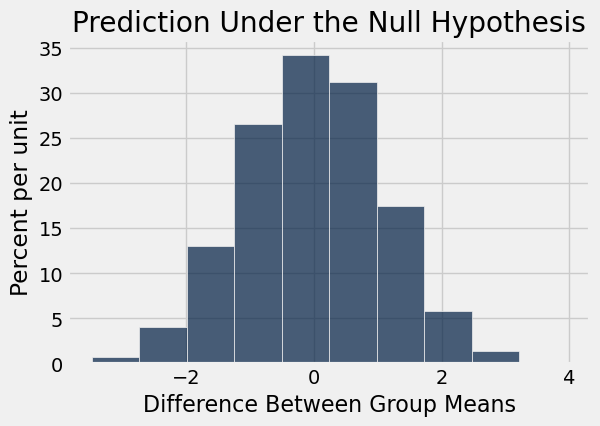

In [53]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis');

In [56]:
differences.min()

-3.478151042856922

The average difference is 0.  The minimum value using random chance differences is much less than the -9.266.  Therefore, we would say there is a difference in birth weights between Mother who smoked and those do not smoke.

In [57]:
# Empirical p-value
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

# Another Permutation Test
Using the Maternal Smoking column we can compare other number values such as age.

In [60]:
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

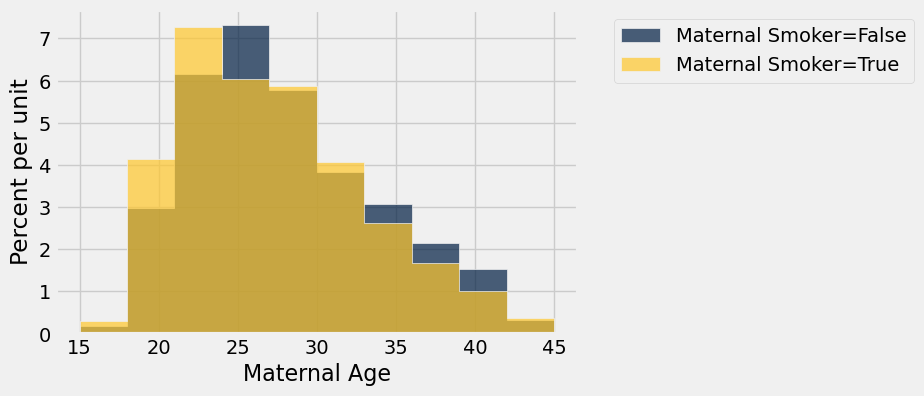

In [59]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

Maternal Smoker | Maternal Age average
False           | 27.5441
True            | 26.7364

In [89]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean ages of the two groups"""
    reduced = table.select('Maternal Age', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [90]:
observed_age_difference = difference_of_means(births, 'Maternal Smoker' )
observed_age_difference

-0.8076725017901509

In [91]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean ages
    of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of ages and shuffled labels
    shuffled_table = births.select('Maternal Age').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [93]:
one_simulated_difference_of_means()

0.01509514450691185

In [94]:
age_differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    age_differences = np.append(age_differences, new_difference)

In [97]:
age_differences.min()

-1.3621463503816464

In [98]:
age_differences.max()

1.2134741075917539

Observed Difference: -0.8076725017901509


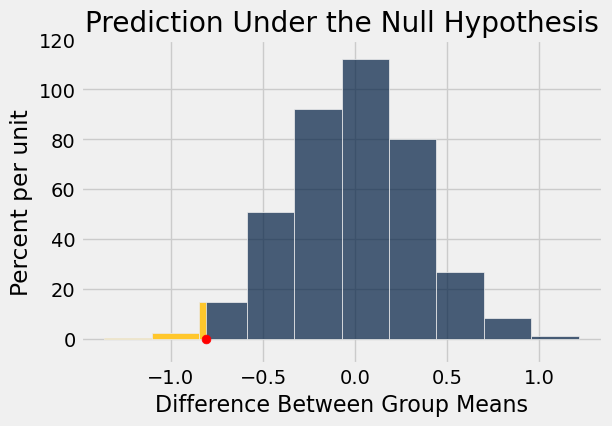

In [96]:
Table().with_column(
    'Difference Between Group Means', age_differences).hist(
    right_end = observed_age_difference)

# Plotting parameters; you can ignore the code below
plt.ylim(-0.1, 1.2)
plt.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

In [99]:
# Empirical P value
empirical_p = np.count_nonzero(age_differences <= observed_age_difference)/5000
empirical_p

0.0083999999999999995

# Conclusion
Smokers are younger than non-smokers when giving birth